In [1]:
from Intern_Utveckling.DCF import *
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [2]:
company_ticker = 'PYPL'
market_ticker = '^GSPC'
outstanding_shares = 1134 # miljoner
company_present_price = 58.46 # USD

def calculate_valuation(perpetual_growth_rate_input, rfr, beta = None):
    # Ange parametrarna i separata variabler
    path_to_company_data = 'Bolags Data/Paypal.xlsx'
    market_return = 0.1 # The higher the market return, the lower the valuation
    cost_of_debt = rfr
    tax_rate = 0.21
    perpetual_growth_rate = perpetual_growth_rate_input
    stock_yf_code = company_ticker
    market_yf_code = market_ticker
    nr_forecast_years = 3   
         
    if beta is None:
        dcf = DCF(outstanding_shares,path_to_company_data, nr_forecast_years, market_return, cost_of_debt, tax_rate, perpetual_growth_rate, stock_yf_code, market_yf_code)
    else:
        dcf = DCF(outstanding_shares,path_to_company_data, nr_forecast_years, market_return, cost_of_debt, tax_rate, perpetual_growth_rate, stock_yf_code, market_yf_code, beta)

    valuation = dcf.perform_dcf()
    return valuation

def calc_beta():
    # Ange parametrarna i separata variabler
    path_to_company_data = 'Bolags Data/Visa.xlsx'
    market_return = 0.1 # The higher the market return, the lower the valuation
    cost_of_debt = 0.06
    tax_rate = 0.21
    perpetual_growth_rate = 0.02
    stock_yf_code = company_ticker
    market_yf_code = market_ticker
    nr_forecast_years = 3
    rfr = 0.02         

    dcf = DCF(outstanding_shares, path_to_company_data, nr_forecast_years, market_return, cost_of_debt, tax_rate, perpetual_growth_rate, stock_yf_code, market_yf_code)
    beta = dcf.calculate_beta()
    return beta



In [3]:
# Skapa linspace
ppgr_values = np.linspace(0.005, 0.035, 10)  # 100 värden från 0.001 till 0.2

# Bestäm värden för den riskfria räntan som du vill utforska
risk_free_rates = [0.02, 0.03, 0.04, 0.05, 0.06]  # Exempelvärden

plt.figure(figsize=(10,6))

#Beärkning av beta en gång för alla
beta = calc_beta()
print(beta)

for rfr in risk_free_rates:
    valuation_results = [calculate_valuation(ppgr, rfr, beta) for ppgr in ppgr_values]
    plt.plot(ppgr_values, valuation_results, label=f'Risk-Free Rate = {rfr*100}%')

# Lägg till en horisontell linje vid Paypals pris
plt.axhline(y=company_present_price, color='y', linestyle='--', label='Mastercard Current Price')

plt.xlabel('Perpetual Growth Rate')
plt.ylabel('Valuation (USD)')
plt.title('Valuation vs. Perpetual Growth Rate for Different Risk-Free Rates - Visa')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


1.6072827620797498


AttributeError: 'DCF' object has no attribute 'outstanding_shares'

<Figure size 1000x600 with 0 Axes>

In [ ]:
#test
beta = calc_beta()
perp_g = 0.02
rfr = 0.02
print(calculate_valuation(perp_g, rfr, beta))

WACC: 0.0809892168225702
WACC: 0.05080501630244434
wacc: 0.05080501630244434
108.19221357759221


WACC: 0.0809892168225702
WACC: 0.04658862380391929
wacc: 0.04658862380391929
WACC: 0.04658862380391929
wacc: 0.04658862380391929
WACC: 0.04658862380391929
wacc: 0.04658862380391929
WACC: 0.04658862380391929
wacc: 0.04658862380391929
WACC: 0.04658862380391929
wacc: 0.04658862380391929
WACC: 0.04658862380391929
wacc: 0.04658862380391929
WACC: 0.04658862380391929
wacc: 0.04658862380391929
WACC: 0.04658862380391929
wacc: 0.04658862380391929
WACC: 0.04658862380391929
wacc: 0.04658862380391929
WACC: 0.04658862380391929
wacc: 0.04658862380391929
WACC: 0.04858586235585221
wacc: 0.04858586235585221
WACC: 0.04858586235585221
wacc: 0.04858586235585221
WACC: 0.04858586235585221
wacc: 0.04858586235585221
WACC: 0.04858586235585221
wacc: 0.04858586235585221
WACC: 0.04858586235585221
wacc: 0.04858586235585221
WACC: 0.04858586235585221
wacc: 0.04858586235585221
WACC: 0.04858586235585221
wacc: 0.04858586235585221
WACC: 0.04858586235585221
wacc: 0.04858586235585221
WACC: 0.04858586235585221
wacc: 0.04858

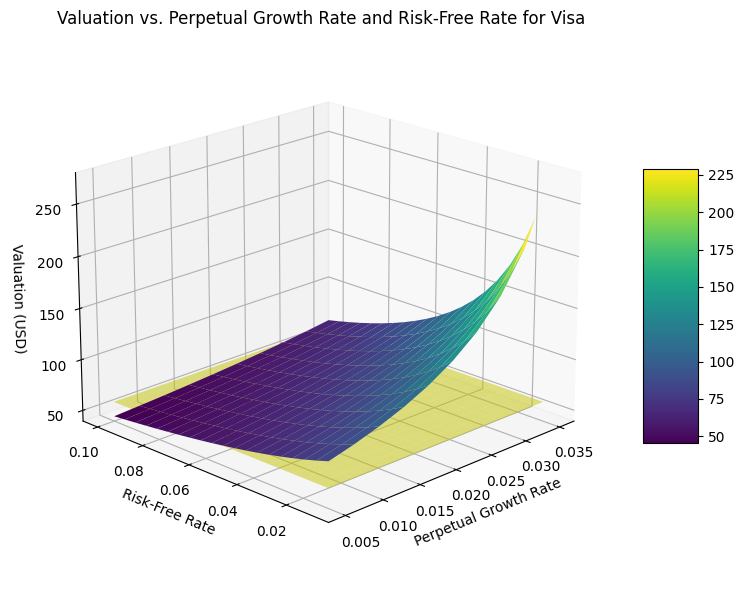

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Antag att du redan har funktionerna calc_beta() och calculate_valuation() definierade, 
# samt värdet för company_present_price

# Linspace för båda variablerna
ppgr_values = np.linspace(0.005, 0.035, 10)
risk_free_rates = np.linspace(0.01, 0.10, 20)

# Skapa ett rutnät av värden med hjälp av meshgrid
PPGR, RFR = np.meshgrid(ppgr_values, risk_free_rates)

# Beräkna värderingar för varje kombination av ppgr och rfr
beta = calc_beta()
valuation_data = np.array([calculate_valuation(ppgr, rfr, beta) for ppgr, rfr in zip(np.ravel(PPGR), np.ravel(RFR))])
VALUATION = valuation_data.reshape(PPGR.shape)

# Skapa 3D-plot
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(PPGR, RFR, VALUATION, cmap='viridis', edgecolor='none')

# Lägg till en kontur där 3D-ytan skär med Mastercard's pris
ax.contour(PPGR, RFR, VALUATION, levels=[company_present_price], colors='red', linestyles='dashed')

# Skapa ett z-värde som motsvarar Mastercard's pris över hela området
Z_mastercard = company_present_price * np.ones(PPGR.shape)

# Plotta planet
ax.plot_surface(PPGR, RFR, Z_mastercard, color='yellow', alpha=0.5)

ax.set_xlabel('Perpetual Growth Rate')
ax.set_ylabel('Risk-Free Rate')
ax.set_zlabel('Valuation (USD)')
ax.set_title('Valuation vs. Perpetual Growth Rate and Risk-Free Rate for Visa')

# Lägg till en colorbar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
ax.view_init(20, -135)  # Elevation = 20°, Azimuthal angle = -135°
plt.tight_layout()
plt.show()
